### Loading libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Loadind dataset

In [2]:
df1=pd.read_csv("d1.csv")

In [3]:
df1.head()

,country,Region,Surface area (km2),Population in thousands (2017),GDP per capita (current US$),Agricultural production index,International trade: Imports (million US$)
0,Afghanistan,SouthernAsia,652864,35530,623.2,125,3568
1,Albania,SouthernEurope,28748,2930,3984.2,134,4669
2,Algeria,NorthernAfrica,2381741,41318,4154.1,160,47091
3,Angola,MiddleAfrica,1246700,29784,4714.1,175,8790
4,Antigua and Barbuda,Caribbean,442,102,14764.5,88,491


In [4]:
df1.dtypes

country                                        object
Region                                         object
Surface area (km2)                              int64
Population in thousands (2017)                  int64
GDP per capita (current US$)                  float64
Agricultural production index                   int64
International trade: Imports (million US$)      int64
dtype: object

### Checking for null values

In [5]:
df1.isnull().sum()

country                                       0
Region                                        0
Surface area (km2)                            0
Population in thousands (2017)                0
GDP per capita (current US$)                  0
Agricultural production index                 0
International trade: Imports (million US$)    0
dtype: int64

<b><i>No NULL values found</i></b>

### 1. Number of countries in the dataset

In [6]:
df1['country'].value_counts().count()

196

<b><i>There are <u>196</u> countries in the dataset</i></b>

### 2. Examine the data using visualizations

In [40]:
df1['GDP per capita (current US$)'].value_counts(bins=10)

(44.483000000000004, 10146.13]    127
(10146.13, 20147.76]               28
(20147.76, 30149.39]               10
(40151.02, 50152.65]                9
(30149.39, 40151.02]                8
(50152.65, 60154.28]                6
(70155.91, 80157.54]                3
(90159.17, 100160.8]                2
(60154.28, 70155.91]                2
(80157.54, 90159.17]                1
Name: GDP per capita (current US$), dtype: int64

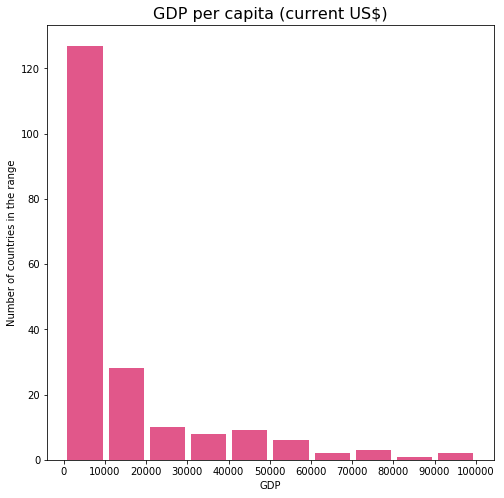

In [47]:
plt.figure(figsize=(8,8))
plt.hist(df1['GDP per capita (current US$)'],color='#E1578A',rwidth=0.85,bins=10)
plt.title("GDP per capita (current US$)",fontsize=16)
plt.xlabel("GDP",fontsize=10)
plt.ylabel("Number of countries in the range",fontsize=10)
plt.xticks(np.arange(0,110000,10000))
plt.yticks()
plt.show()

In [48]:
df1['International trade: Imports (million US$)'].value_counts(bins=10)

(-2237.65, 224976.9]      179
(224976.9, 449941.8]       10
(449941.8, 674906.7]        4
(2024696.1, 2249661.0]      1
(1574766.3, 1799731.2]      1
(899871.6, 1124836.5]       1
(1799731.2, 2024696.1]      0
(1349801.4, 1574766.3]      0
(1124836.5, 1349801.4]      0
(674906.7, 899871.6]        0
Name: International trade: Imports (million US$), dtype: int64

In [57]:
df1['country'][df1['International trade: Imports (million US$)']<0].count()

0

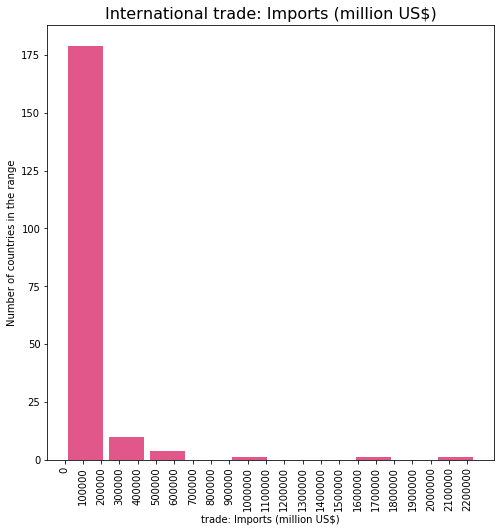

In [52]:
plt.figure(figsize=(8,8))
plt.hist(df1['International trade: Imports (million US$)'],color='#E1578A',rwidth=0.85,bins=10)
plt.title("International trade: Imports (million US$)",fontsize=16)
plt.xlabel("trade: Imports (million US$)",fontsize=10)
plt.ylabel("Number of countries in the range",fontsize=10)
plt.xticks(np.arange(0,2300000,100000))
plt.yticks()
plt.xticks(rotation=90)
plt.show()

### 3. Number of countries with respect to Regions

In [7]:
df1[['country','Region']].groupby('Region').count()

,country
Region,
Caribbean,16
CentralAmerica,8
CentralAsia,5
EasternAfrica,17
EasternAsia,7
EasternEurope,10
Melanesia,5
Micronesia,4
MiddleAfrica,9


### 4. a. On average which region has the highest GDP per capita (current US$)

In [13]:
df1[['Region','GDP per capita (current US$)']]\
    .groupby('Region').sum()\
    .sort_values(by=['GDP per capita (current US$)'], inplace=False, ascending=False).head(1)

,GDP per capita (current US$)
Region,
NorthernEurope,420982.2


<b><i>NorthernEurope has the highest per capita(current US$) on average</i></b>

### 4. b. On average which region has the highest International trade: Imports (million US$)

In [14]:
df1[['Region','International trade: Imports (million US$)']]\
    .groupby('Region').sum()\
    .sort_values(by=['International trade: Imports (million US$)'], inplace=False, ascending=False).head(1)

,International trade: Imports (million US$)
Region,
EasternAsia,3163965


<b><i>EasternAsia has the highest International trade: Imports (million US$) on average</i></b>

### 5. Which region is more consistent with respect to GDP per capita (current US$)

In [18]:
df2=df1[['GDP per capita (current US$)','Region']]\
    .groupby("Region").std()\
    .sort_values(by=['GDP per capita (current US$)'],inplace=False)

In [24]:
df2.head(1)

,GDP per capita (current US$)
Region,
WesternAfrica,815.095399


<b><i>WesternAfrica is more consistent with respect to GDP per capita (current US$)</i></b>